In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

# TP 1 

In [2]:
data = pd.read_pickle("data/dataset_RH.pkl") 
df = pd.DataFrame(data[0])
labels = data[1]
df['démissionné'] = labels
df

,Famille d'emploi,Dernière promotion (mois),Dernière augmentation (mois),Début de contrat (années),Ancienneté groupe (années),Etablissement,Âge (années),Parent,Niveau hiérarchique,Salaire (Euros),Statut marital,Véhicule,matricule,démissionné
0,Production,8.510000,7.900000,0.910000,0.970000,27,30,1,1,3199,Marié(e),0,32,0
1,Production,35.119999,22.690001,14.830000,16.299999,7,45,1,2,3861,Marié(e),1,1890,0
2,Production,25.299999,22.139999,17.309999,17.790001,28,49,1,2,4324,PACS,1,1847,0
3,Production,5.240000,5.100000,1.020000,1.750000,27,24,0,1,2641,Célibataire,0,2619,1
4,Production,35.919998,22.840000,8.050000,9.000000,7,46,1,2,5072,Marié(e),1,1963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23852,Support,6.140000,4.750000,11.430000,12.560000,28,35,1,1,2966,Marié(e),0,2210,0
23853,Support,5.510000,4.780000,1.800000,2.430000,28,28,1,1,3044,Marié(e),0,1318,0
23854,Production,6.710000,4.790000,10.430000,16.100000,19,47,1,1,3523,Marié(e),0,1932,0
23855,Support,17.510000,4.470000,13.400000,14.050000,2,35,1,1,3175,Marié(e),0,2014,0


In [3]:
# General info about the dataframe
print(df.info())

# Basic statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23857 entries, 0 to 23856
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Famille d'emploi              23857 non-null  object 
 1   Dernière promotion (mois)     23857 non-null  float64
 2   Dernière augmentation (mois)  23857 non-null  float64
 3   Début de contrat (années)     23857 non-null  float64
 4   Ancienneté groupe (années)    23857 non-null  float64
 5   Etablissement                 23857 non-null  int64  
 6   Âge (années)                  23857 non-null  int64  
 7   Parent                        23857 non-null  int64  
 8   Niveau hiérarchique           23857 non-null  int64  
 9   Salaire (Euros)               23857 non-null  int64  
 10  Statut marital                23857 non-null  object 
 11  Véhicule                      23857 non-null  int64  
 12  matricule                     23857 non-null  int64  
 13  d

### Data Quality Observations

#### 1. Missing Values

From the statistical summary and previous data inspections, we observe that there are **no missing values** in the dataset. All columns have a consistent count of 23,857 entries, which matches the number of rows in the dataset.

#### 2. `matricule` Might Not Be a Unique Identifier

The column `matricule` appears to be used as an identifier, but a closer look at its summary statistics suggests otherwise:

```
count    23857.000000
mean      1361.255858
std        794.183153
min          0.000000
25%        655.000000
50%       1371.000000
75%       2072.000000
max       2675.000000
```

Given that:
- There are 23,857 rows but only values ranging between 0 and 2675,
- And statistical measures such as mean and standard deviation are meaningful (indicating repetition of values),

We can conclude that **`matricule` is not unique**, and the same person may appear multiple times in the dataset. This makes sense in an HR dataset where multiple entries could represent different events or time periods for the same employee.

#### 3. Potential Age Outlier

In the age-related statistics:

```
Âge (années)
max: 100.0
```

We observe that one entry has an age of **100 years**, which is likely to be **unrealistic** in the context of an active HR dataset. This kind of outlier could **negatively affect the performance of machine learning models** and should be either investigated or filtered during the preprocessing step.


In [15]:
import random

repeated_matricules = df['matricule'].value_counts()
repeated_matricules = repeated_matricules[repeated_matricules > 1]

print("Repeated matricules:")
print(repeated_matricules)

random_matricule = random.choice(repeated_matricules.index.tolist())
print(f"\nRandomly selected repeated matricule: {random_matricule}")

print(f"\nAll rows with matricule {random_matricule}:")
display(df[df['matricule'] == random_matricule])

df.groupby('matricule').agg({
    'Salaire (Euros)': pd.Series.nunique,
    'Âge (années)': pd.Series.nunique,
    'Niveau hiérarchique': pd.Series.nunique,
    'Début de contrat (années)': pd.Series.nunique
}).mean()

Repeated matricules:
matricule
32      15
2311    15
2242    15
1825    15
77      15
        ..
2521     2
2568     2
2352     2
225      2
2544     2
Name: count, Length: 2490, dtype: int64

Randomly selected repeated matricule: 2266

All rows with matricule 2266:


,Famille d'emploi,Dernière promotion (mois),Dernière augmentation (mois),Début de contrat (années),Ancienneté groupe (années),Etablissement,Âge (années),Parent,Niveau hiérarchique,Salaire (Euros),Statut marital,Véhicule,matricule,démissionné
1703,Etudes & Technique,35.930000,1.88,8.15,7.65,19,36,1,1,3520,Marié(e),0,2266,0
3214,Etudes & Technique,38.790001,4.77,8.45,8.45,19,37,1,1,3520,Marié(e),0,2266,0
4764,Etudes & Technique,41.680000,7.71,8.76,8.76,19,37,1,1,3521,Marié(e),0,2266,0
5576,Etudes & Technique,44.570000,10.64,9.06,9.06,19,38,1,1,3521,Marié(e),0,2266,0
7164,Etudes & Technique,47.660000,13.66,9.30,9.36,19,39,1,1,3517,Marié(e),0,2266,0
8807,Etudes & Technique,50.759998,2.13,9.60,9.66,19,39,1,1,3610,Marié(e),0,2266,0
10497,Etudes & Technique,53.650002,5.07,9.91,9.96,19,40,1,1,3610,Marié(e),0,2266,0
12232,Etudes & Technique,56.529999,8.01,10.22,10.26,19,40,1,1,3609,Marié(e),0,2266,0
14006,Etudes & Technique,59.730000,2.29,10.43,10.56,19,40,1,1,3715,Marié(e),0,2266,0
15804,Etudes & Technique,62.540001,5.20,10.73,10.86,19,41,1,1,3713,Marié(e),0,2266,0


Salaire (Euros)              7.730942
Âge (années)                 5.440583
Niveau hiérarchique          1.126682
Début de contrat (années)    8.888266
dtype: float64

### Are Repeated `matricule` Entries Temporal?

To determine whether the repeated occurrences of `matricule` in our dataset reflect temporal records or redundant duplicates, we computed the **average number of unique values** per `matricule` across several key features:

```
Salaire (Euros)              ≈ 7.73
Âge (années)                 ≈ 5.44
Niveau hiérarchique          ≈ 1.13
Début de contrat (années)    ≈ 8.89
```

These results indicate that, on average:
- Each individual has around **8 different recorded salaries**, 
- **5 different age values**, 
- And nearly **9 different contract start years**.

Such variations are consistent with the natural evolution of an employee's profile over time and suggest that the dataset captures **temporal dynamics**. 

Only the hierarchical level remains relatively stable (≈1.1 unique values), which is reasonable, as job levels may not change as frequently.

**Conclusion:**  
We interpret the repeated `matricule` entries as meaningful time-based records rather than simple duplicates. These temporal patterns can be valuable in modeling employee resignation behavior and should be preserved during data preprocessing and modeling stages.


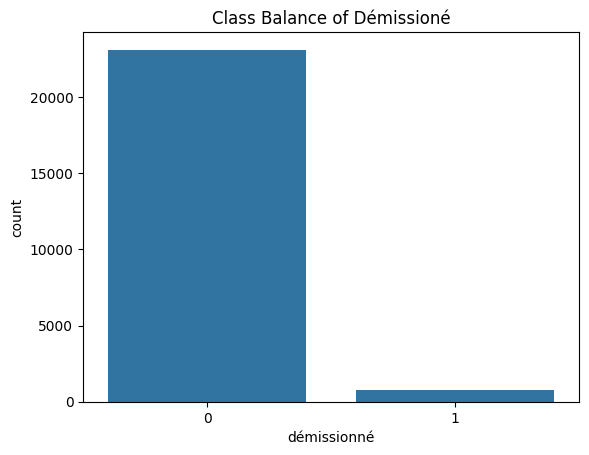

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='démissionné', data=df)
plt.title('Class Balance of Démissioné')
plt.show()

## This show a enourmous imbalance dataset, something that could be also a problem

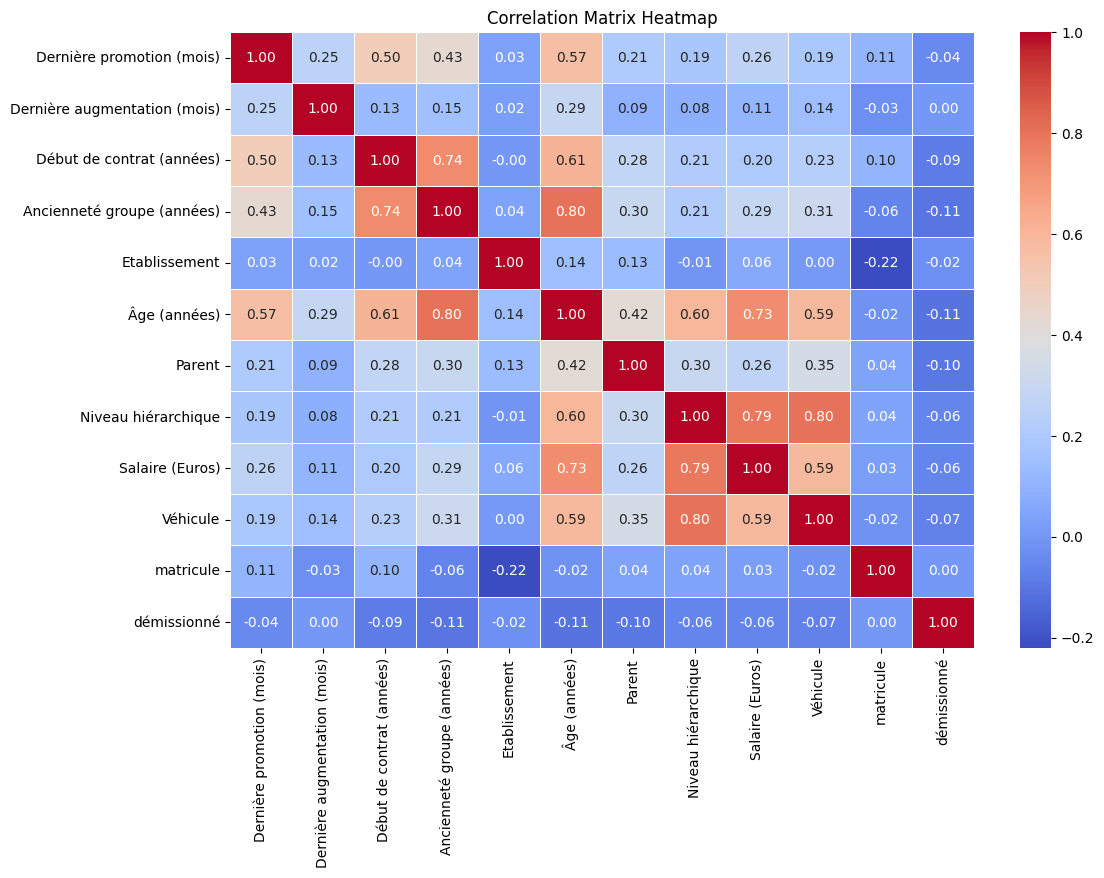

In [11]:

numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()

correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Analysis of the Correlation Matrix

The correlation heatmap provides a global view of the linear relationships between variables in the dataset. Several notable observations can be made regarding both strong and weak correlations.

#### 1. Strong and Expected Correlations

Some features exhibit strong correlations that are both expected and logical given the HR context:

- `Ancienneté groupe (années)` and `Début de contrat (années)` show a strong positive correlation (0.74), which is coherent since both relate to the employee’s tenure within the organization.
- `Âge (années)` is also highly correlated with these two variables (0.80 with `Ancienneté`, and 0.61 with `Début de contrat`), suggesting that older employees tend to have longer tenure, as one might expect.
- A strong correlation is observed between `Salaire (Euros)` and both `Niveau hiérarchique` (0.79) and `Âge (0.73)`, as well as with `Véhicule` (0.80). These associations reflect a likely organizational structure where higher salaries and access to vehicles are linked to more senior or experienced employees.

While these correlations can be beneficial for predictive modeling, they should also be handled with care to avoid redundancy. High correlation between features (multicollinearity) can distort model interpretation, particularly in linear models.

#### 2. Weak or Unexpected Correlations

On the other hand, the variable `démissionné` does not exhibit any strong correlation with other features. The highest observed correlation in absolute value is only -0.11 (with `Âge` and `Ancienneté`). This indicates that resignation is likely influenced by complex or non-linear interactions, or by unobserved external factors not captured in this dataset.

A more puzzling observation is the **negative correlation between `Etablissement` and `matricule` (-0.22)**. This may suggest that certain establishments tend to have employees with systematically lower or higher matricule values, potentially due to regional or administrative numbering systems. However, the exact meaning would require further context or clarification from the data source.

#### 3. Implications and Recommendations

It is important to underline that some of these strong correlations may represent **feature redundancy**. For instance, `Ancienneté`, `Âge`, and `Début de contrat` all convey overlapping information. In predictive modeling, particularly in machine learning contexts, such redundancy should be addressed either by removing one of the variables or by applying dimensionality reduction techniques.

Conversely, some correlations reflect **meaningful structural relationships** within the data (e.g., between salary and vehicle assignment) and can enhance model performance if used appropriately.

---

**Conclusion:**  
This correlation analysis helps identify patterns that may influence model design and performance. It also highlights variables that require careful consideration, whether due to redundancy, low informativeness, or unusual patterns. A thorough understanding of these relationships is crucial for building robust, interpretable, and well-generalized predictive models.


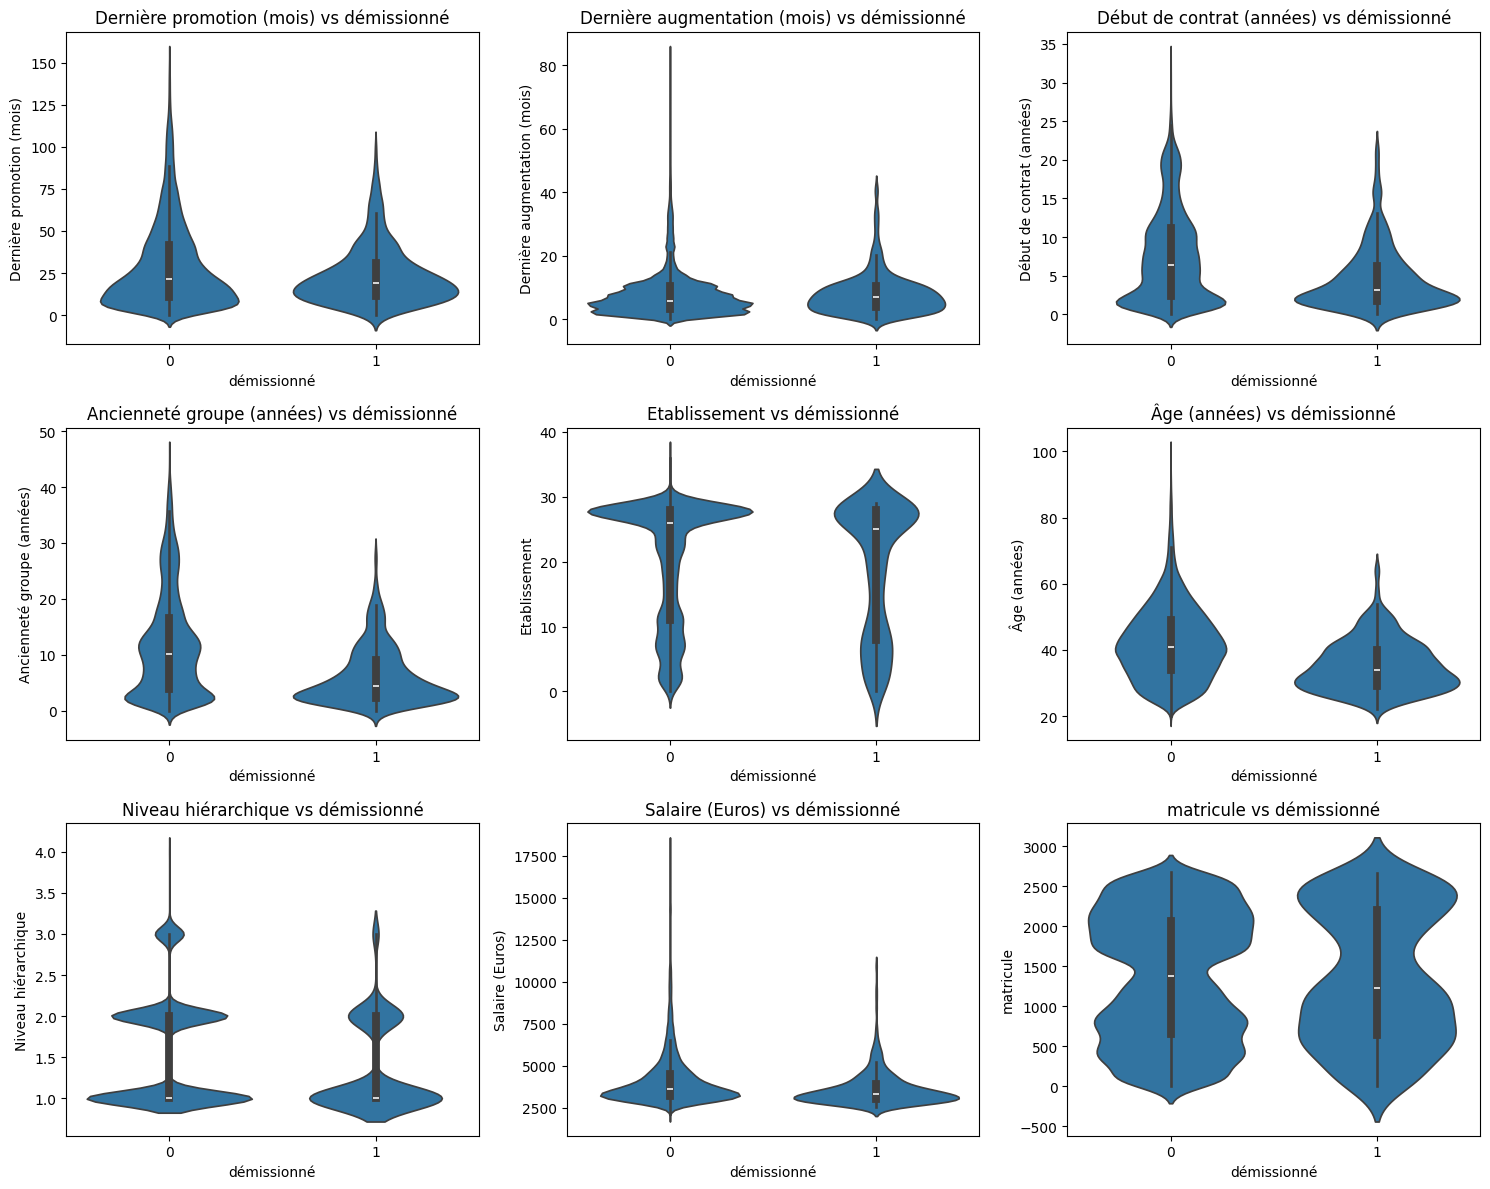

In [18]:
# Define excluded columns
exclude_cols = ['Parent', 'démissionné', 'Véhicule']

# Select numeric columns and filter
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
numeric_cols_filtered = [col for col in numeric_cols if col not in exclude_cols]

# Determine grid size
n_cols = 3
n_rows = math.ceil(len(numeric_cols_filtered) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()  # Flatten to iterate easily

# Plot each violin plot in the grid
for i, col in enumerate(numeric_cols_filtered):
    sns.violinplot(x='démissionné', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs démissionné')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### Violin Plot Analysis – Feature Distributions by Resignation Status

We generated violin plots to compare the distribution of numeric features between employees who stayed (class 0) and those who resigned (class 1). Several clear patterns emerged:

- **Younger and newer employees** (lower age, lower seniority, more recent contract start dates) are **more likely to resign**.
- **Higher salary and recent promotions** are associated with **employee retention**.
- Employees at **lower hierarchical levels** are more likely to quit, potentially due to fewer responsibilities or opportunities.
- **`matricule` does not show a meaningful distribution difference** and can be excluded from predictive modeling.

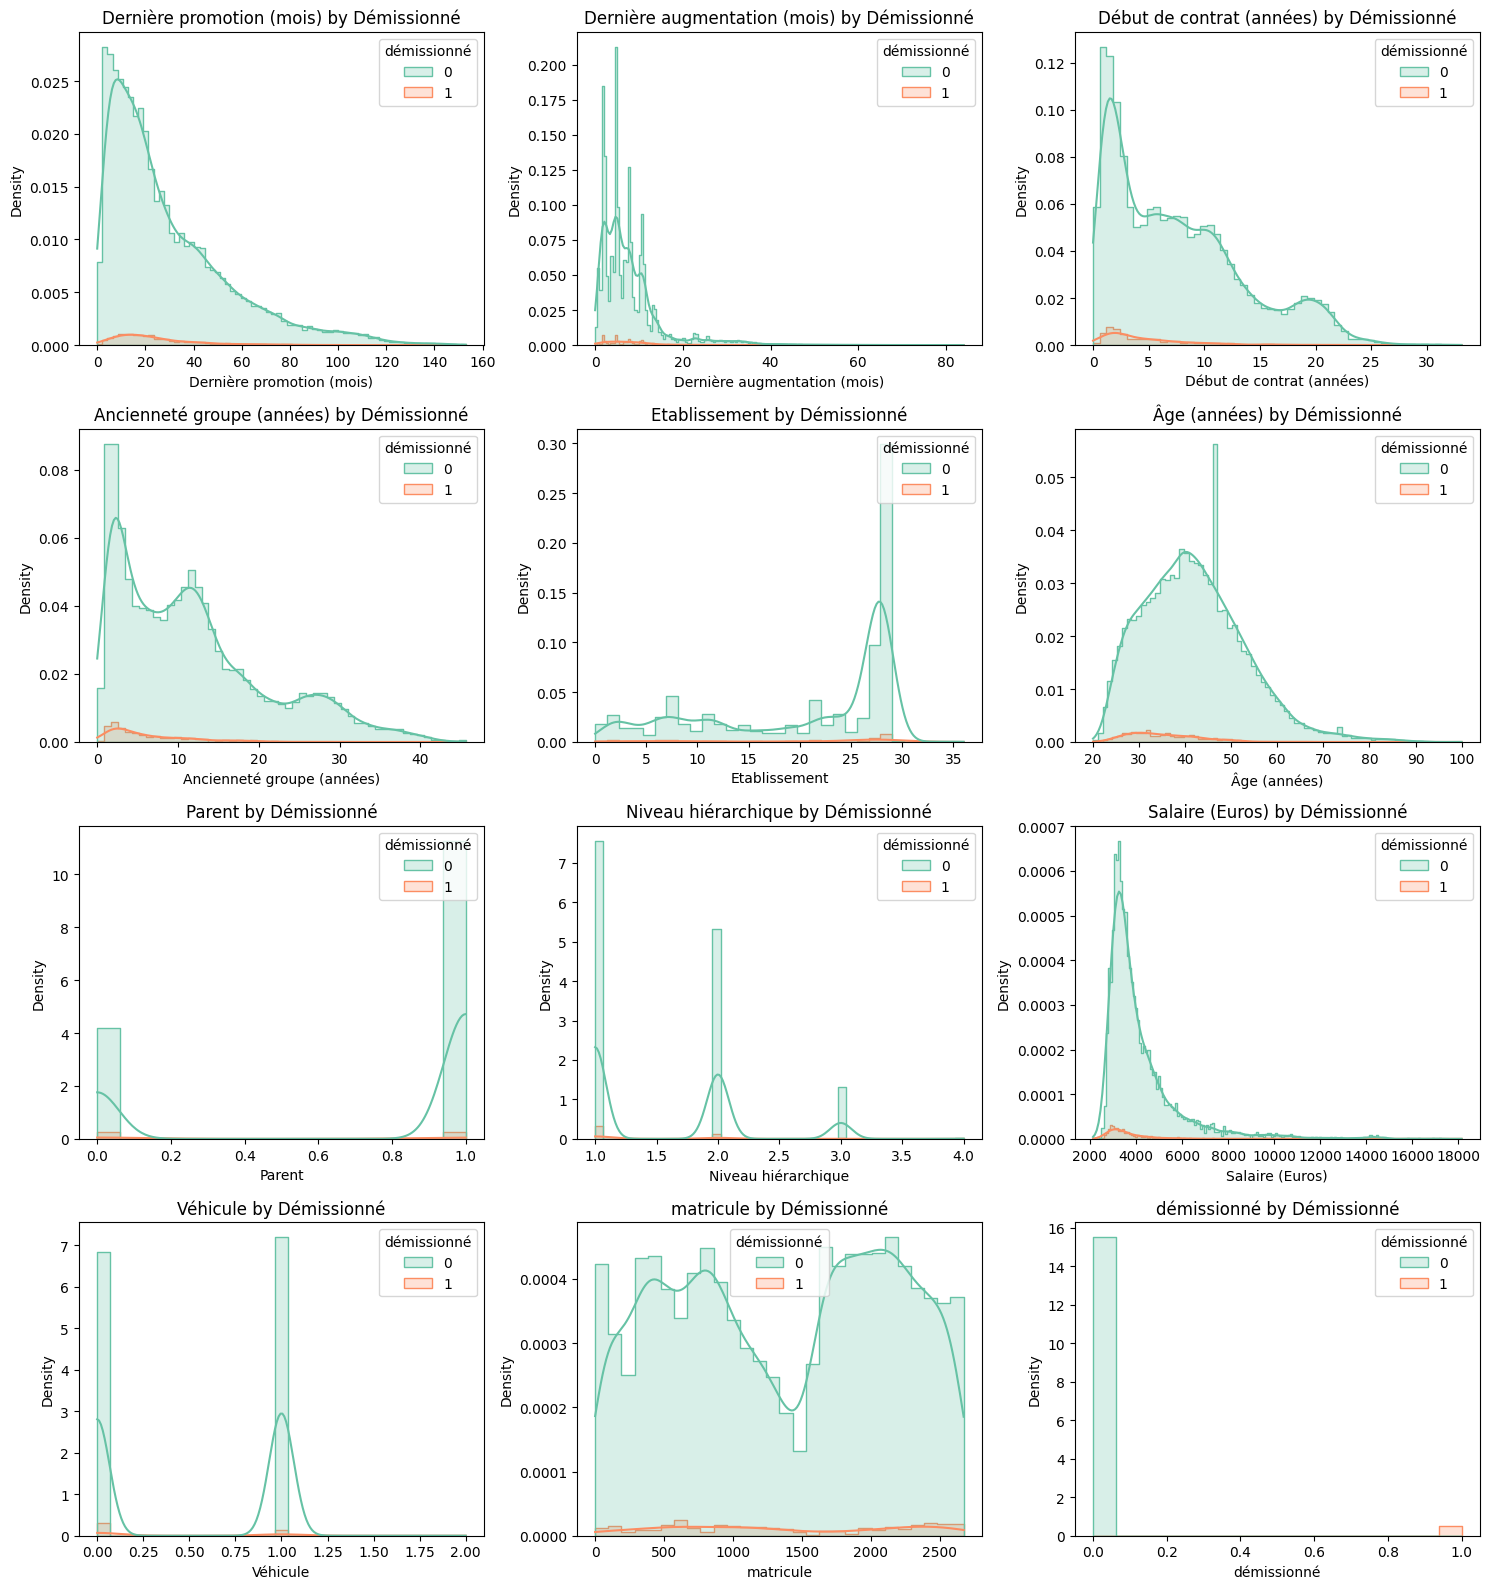

In [19]:
numeric_cols = [col for col in df.columns if df[col].dtype != 'object']

n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, hue='démissionné', kde=True, ax=axes[i], palette='Set2', element='step', stat='density')
    axes[i].set_title(f'{col} by Démissionné')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [21]:
df["Famille d\'emploi"].unique()
df = pd.get_dummies(df, columns=["Famille d'emploi"], drop_first=True)
df["Statut marital"].unique()
df = pd.get_dummies(df, columns=["Statut marital"], drop_first=True)
df

,Dernière promotion (mois),Dernière augmentation (mois),Début de contrat (années),Ancienneté groupe (années),Etablissement,Âge (années),Parent,Niveau hiérarchique,Salaire (Euros),Véhicule,...,Famille d'emploi_Production,Famille d'emploi_Support,Statut marital_Célibataire,Statut marital_Divorcé(e),Statut marital_Marié(e),Statut marital_PACS,Statut marital_Séparé(e),Statut marital_Union libre,Statut marital_Veuf(ve),Statut marital_ex PACS
0,8.510000,7.900000,0.910000,0.970000,27,30,1,1,3199,0,...,True,False,False,False,True,False,False,False,False,False
1,35.119999,22.690001,14.830000,16.299999,7,45,1,2,3861,1,...,True,False,False,False,True,False,False,False,False,False
2,25.299999,22.139999,17.309999,17.790001,28,49,1,2,4324,1,...,True,False,False,False,False,True,False,False,False,False
3,5.240000,5.100000,1.020000,1.750000,27,24,0,1,2641,0,...,True,False,True,False,False,False,False,False,False,False
4,35.919998,22.840000,8.050000,9.000000,7,46,1,2,5072,1,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23852,6.140000,4.750000,11.430000,12.560000,28,35,1,1,2966,0,...,False,True,False,False,True,False,False,False,False,False
23853,5.510000,4.780000,1.800000,2.430000,28,28,1,1,3044,0,...,False,True,False,False,True,False,False,False,False,False
23854,6.710000,4.790000,10.430000,16.100000,19,47,1,1,3523,0,...,True,False,False,False,True,False,False,False,False,False
23855,17.510000,4.470000,13.400000,14.050000,2,35,1,1,3175,0,...,False,True,False,False,True,False,False,False,False,False


In [25]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, f1_score
import xgboost as xgb  # Import XGBoost

X = df.drop(columns=['démissionné'])
y = df['démissionné']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_resampled, y_train_resampled = X_train, y_train

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler on test set

# Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_scaled, y_train_resampled)
dt_preds = dt_model.predict(X_test_scaled)

# Logistic Regression Model
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train_scaled, y_train_resampled)
lr_preds = lr_model.predict(X_test_scaled)

# XGBoost Model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train_scaled, y_train_resampled)    
xgb_preds = xgb_model.predict(X_test_scaled)

# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print(classification_report(y_true, y_pred))
    print(f"F1-Score: {f1_score(y_true, y_pred)}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred)}")

# Evaluate all models
evaluate_model("Decision Tree", y_test, dt_preds)
evaluate_model("Logistic Regression", y_test, lr_preds)
evaluate_model("XGBoost", y_test, xgb_preds)



Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4621
           1       0.00      0.00      0.00       151

    accuracy                           0.97      4772
   macro avg       0.48      0.50      0.49      4772
weighted avg       0.94      0.97      0.95      4772

F1-Score: 0.0
ROC-AUC: 0.49945899156026835

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.98      0.61      0.76      4621
           1       0.06      0.71      0.10       151

    accuracy                           0.62      4772
   macro avg       0.52      0.66      0.43      4772
weighted avg       0.96      0.62      0.74      4772

F1-Score: 0.10485056344928956
ROC-AUC: 0.6613810261532795

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4621
           1       0.29      0.01      0.03       15

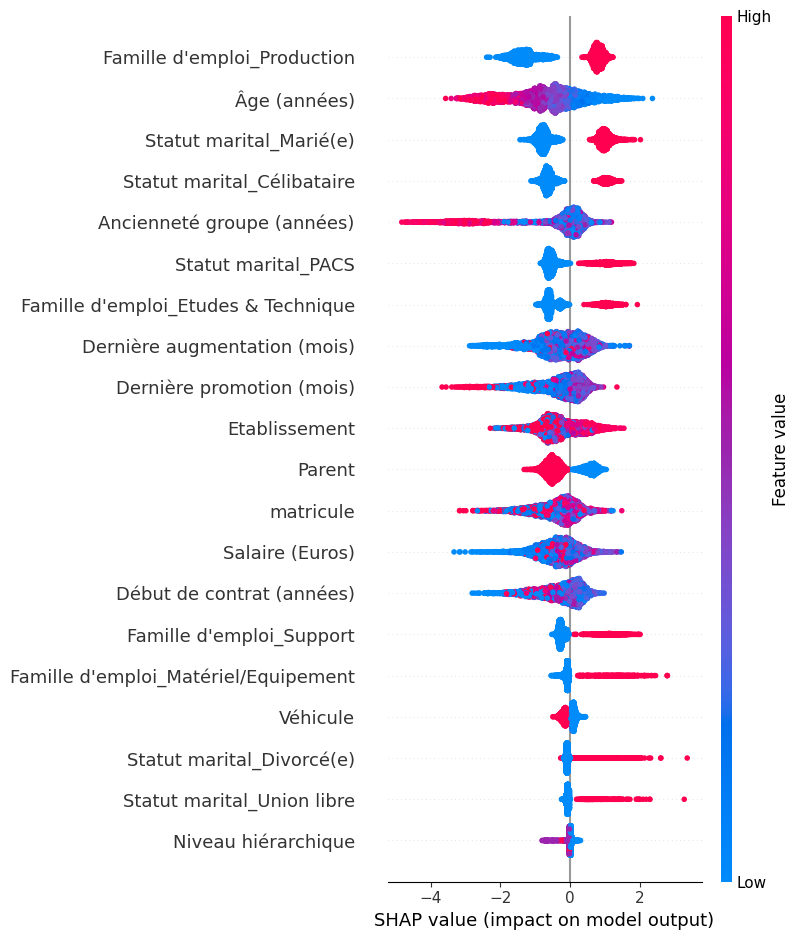

In [13]:
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values, X_test)

In [27]:

xgb_importances = xgb_model.feature_importances_
xgb_features = X_train.columns 
df_xgb = pd.DataFrame({'Feature': xgb_features, 'Importance': xgb_importances})
print("XGBoost Feature Importances:")
print(df_xgb.sort_values(by='Importance', ascending=False))

dt_importances = dt_model.feature_importances_
dt_features = X_train.columns 
df_dt = pd.DataFrame({'Feature': dt_features, 'Importance': dt_importances})
print("\nDecision Tree Feature Importances:")
print(df_dt.sort_values(by='Importance', ascending=False))

XGBoost Feature Importances:
                                      Feature  Importance
6                                      Parent    0.085552
5                                Âge (années)    0.062617
3                  Ancienneté groupe (années)    0.062604
17                   Famille d'emploi_Support    0.057877
16                Famille d'emploi_Production    0.050362
10                                  matricule    0.050330
18                 Statut marital_Célibataire    0.046078
8                             Salaire (Euros)    0.045712
4                               Etablissement    0.045657
15       Famille d'emploi_Matériel/Equipement    0.043561
0                   Dernière promotion (mois)    0.042058
22                   Statut marital_Séparé(e)    0.039314
20                    Statut marital_Marié(e)    0.039084
7                         Niveau hiérarchique    0.038395
23                 Statut marital_Union libre    0.037801
2                   Début de contrat (année

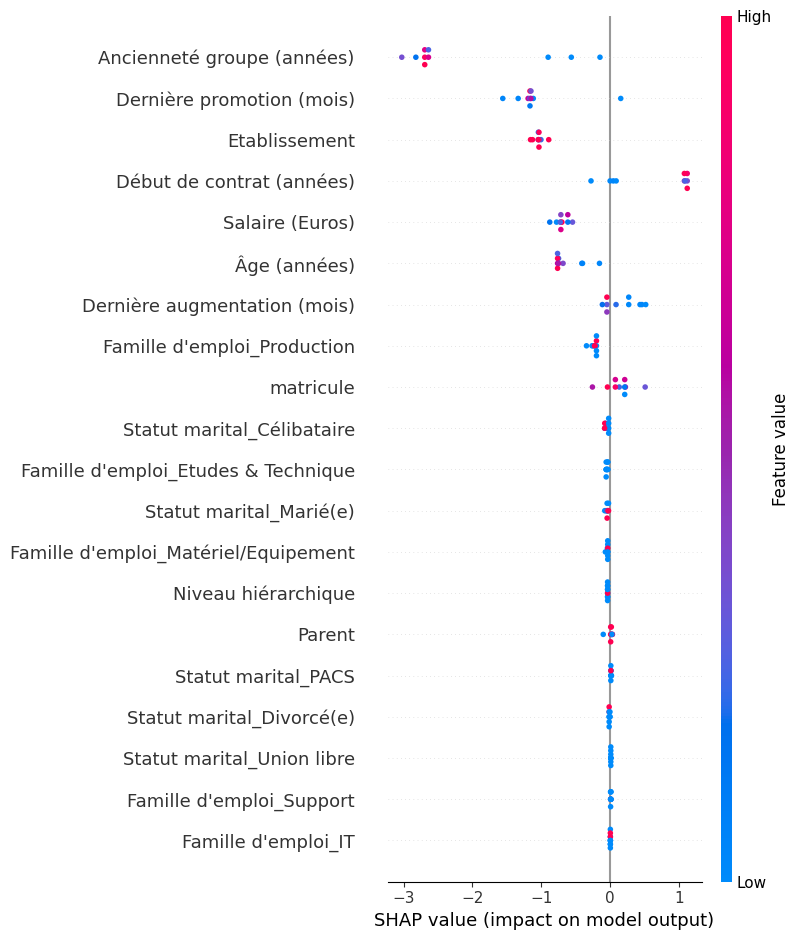

In [34]:
booster = xgb_model.get_booster()

explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(X_test.iloc[:10])
shap.summary_plot(shap_values, X_test.iloc[:10])

### SHAP Value Interpretation – Feature Impact on Resignation Prediction

The SHAP summary plot above helps us understand how each feature influences the model's prediction regarding whether an employee is likely to resign. Each point represents an individual prediction; its position on the x-axis indicates how much that feature increased or decreased the model's output (i.e., the likelihood of resignation), while the color shows the feature value (red = high, blue = low).

#### Key Observations

##### 1. **Ancienneté groupe (années)**
- Higher values (in red) tend to push the SHAP value to the **left** (negative), which lowers the probability of resignation.
- Conversely, lower seniority (in blue) is associated with **higher resignation risk**.
- **Interpretation**: Employees who have been with the company longer are less likely to resign, likely due to stronger engagement or organizational loyalty.

##### 2. **Dernière promotion (mois)**
- Long periods without promotion (red) correlate with **higher resignation risk** (positive SHAP values).
- Shorter intervals since last promotion (blue) tend to decrease the predicted probability of quitting.
- **Interpretation**: A lack of upward mobility is a strong predictor of employee dissatisfaction and turnover.

##### 3. **Début de contrat (années)**
- Employees who started recently (blue, low values) tend to have **positive SHAP values**, suggesting they are more likely to resign.
- Employees with older start dates (red) tend to stay.
- **Interpretation**: Newer employees are at a higher risk of leaving, possibly due to poor onboarding or lack of attachment to the company.

##### 4. **Salaire (Euros)**
- Lower salaries (blue) are associated with **higher SHAP values**, i.e., a higher predicted risk of resignation.
- Higher salaries (red) reduce this risk.
- **Interpretation**: Compensation is a key factor in employee retention.

##### 5. **Âge (années)**
- Younger employees (blue) generally show higher SHAP values, i.e., more likely to quit.
- Older employees (red) lean towards stability.
- **Interpretation**: As often seen in HR analytics, younger employees may be more mobile, career-hungry, or exploratory.

##### 6. **Dernière augmentation (mois)**
- Longer time since the last salary raise increases resignation risk.
- Recent raises are associated with staying.
- **Interpretation**: Raises play a role in employee satisfaction and retention, similar to promotions.

##### 7. **Famille d'emploi** and **Statut marital**
- Certain job families (e.g., `Production`, `Etudes & Technique`) and marital statuses (e.g., `Célibataire`) have a moderate influence on predictions.
- These may reflect lifestyle or job-type differences that correlate with resignation risk.

##### 8. **matricule**
- As expected, `matricule` has no real impact on the model output. Its presence in the plot is due to being treated as a numeric input, but it holds no predictive power.
- **Recommendation**: This feature should be dropped in final model training to avoid noise.

---

### Conclusion

This SHAP analysis confirms that the model has learned patterns that align well with real-world intuition:

- **Employees with low salaries, little tenure, few promotions, and fewer raises are more likely to resign.**
- **Those who are older, well-compensated, promoted regularly, and longer-tenured are more likely to stay.**

Such transparency not only validates the model’s internal logic but also supports **responsible and explainable AI** principles by providing actionable insights for HR decision-making.


### Problem: Low F1-Score for Class 1 (Resigned)

But we have a clear problem: the F1-scores are too low for the model to be considered reliable, especially for identifying those who resign.

In the next step, we will apply the changes identified during our exploratory analysis:
- **Drop highly correlated features**, keeping only one among those with strong correlations.
- **Remove the `matricule` column**, as it carries no predictive information.
- Possibly address **class imbalance** and **feature redundancy**.

We aim to see whether these preprocessing steps can help the model better distinguish between employees who stay and those who resign.

# Post Hoc

In [46]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, f1_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import numpy as np
import pandas as pd


# Compute IQR thresholds for salary
q1_salary = df['Salaire (Euros)'].quantile(0.25)
q3_salary = df['Salaire (Euros)'].quantile(0.75)
iqr_salary = q3_salary - q1_salary
lower_salary = q1_salary - 1.5 * iqr_salary
upper_salary = q3_salary + 1.5 * iqr_salary

# Compute IQR thresholds for age
q1_age = df['Âge (années)'].quantile(0.25)
q3_age = df['Âge (années)'].quantile(0.75)
iqr_age = q3_age - q1_age
lower_age = q1_age - 1.5 * iqr_age
upper_age = q3_age + 1.5 * iqr_age

# Apply filtering
df_filtered = df[
    (df['Salaire (Euros)'] >= lower_salary) & (df['Salaire (Euros)'] <= upper_salary) &
    (df['Âge (années)'] >= lower_age) & (df['Âge (années)'] <= upper_age)
]

# Show how many rows were removed
print(f"Initial dataset size: {len(df)}")
print(f"Filtered dataset size: {len(df_filtered)}")
print(f"Rows removed: {len(df) - len(df_filtered)}")

# 0. Filter to last entry per 'matricule' based on contract start year
df_sorted = df_filtered.sort_values(by=['matricule', 'Début de contrat (années)'])
df_last_entry = df_sorted.drop_duplicates(subset='matricule', keep='last')
display(df)
# 1. Drop unused or redundant columns
columns_to_drop = []
df_cleaned = df_last_entry.drop(columns=columns_to_drop)

# 3. Define features and target
X = df_cleaned.drop(columns=['démissionné'])
y = df_cleaned['démissionné']


# 4. Train-test split (before applying SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 6. Compute class weights for use in XGBoost
classes = np.unique(y_train_resampled)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_resampled)
class_weights = dict(zip(classes, weights))
scale_pos_weight = class_weights[0] / class_weights[1]

# 7. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# 8. Train models

# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_scaled, y_train_resampled)
dt_preds = dt_model.predict(X_test_scaled)

# Logistic Regression
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train_scaled, y_train_resampled)
lr_preds = lr_model.predict(X_test_scaled)

# XGBoost
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train_resampled)
xgb_preds = xgb_model.predict(X_test_scaled)

# 9. Evaluation
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print(classification_report(y_true, y_pred))
    print(f"F1-Score: {f1_score(y_true, y_pred)}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred)}")

evaluate_model("Decision Tree (SMOTE)", y_test, dt_preds)
evaluate_model("Logistic Regression (SMOTE)", y_test, lr_preds)
evaluate_model("XGBoost (SMOTE)", y_test, xgb_preds)


Initial dataset size: 23857
Filtered dataset size: 22043
Rows removed: 1814


,Dernière promotion (mois),Dernière augmentation (mois),Début de contrat (années),Ancienneté groupe (années),Etablissement,Âge (années),Parent,Niveau hiérarchique,Salaire (Euros),Véhicule,...,Famille d'emploi_Production,Famille d'emploi_Support,Statut marital_Célibataire,Statut marital_Divorcé(e),Statut marital_Marié(e),Statut marital_PACS,Statut marital_Séparé(e),Statut marital_Union libre,Statut marital_Veuf(ve),Statut marital_ex PACS
0,8.510000,7.900000,0.910000,0.970000,27,30,1,1,3199,0,...,True,False,False,False,True,False,False,False,False,False
1,35.119999,22.690001,14.830000,16.299999,7,45,1,2,3861,1,...,True,False,False,False,True,False,False,False,False,False
2,25.299999,22.139999,17.309999,17.790001,28,49,1,2,4324,1,...,True,False,False,False,False,True,False,False,False,False
3,5.240000,5.100000,1.020000,1.750000,27,24,0,1,2641,0,...,True,False,True,False,False,False,False,False,False,False
4,35.919998,22.840000,8.050000,9.000000,7,46,1,2,5072,1,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23852,6.140000,4.750000,11.430000,12.560000,28,35,1,1,2966,0,...,False,True,False,False,True,False,False,False,False,False
23853,5.510000,4.780000,1.800000,2.430000,28,28,1,1,3044,0,...,False,True,False,False,True,False,False,False,False,False
23854,6.710000,4.790000,10.430000,16.100000,19,47,1,1,3523,0,...,True,False,False,False,True,False,False,False,False,False
23855,17.510000,4.470000,13.400000,14.050000,2,35,1,1,3175,0,...,False,True,False,False,True,False,False,False,False,False


c:\Users\mateu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



Decision Tree (SMOTE) Performance:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       424
           1       0.34      0.64      0.44        80

    accuracy                           0.74       504
   macro avg       0.63      0.70      0.64       504
weighted avg       0.83      0.74      0.77       504

F1-Score: 0.44155844155844154
ROC-AUC: 0.7008254716981132

Logistic Regression (SMOTE) Performance:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       424
           1       0.38      0.33      0.35        80

    accuracy                           0.81       504
   macro avg       0.63      0.61      0.62       504
weighted avg       0.80      0.81      0.80       504

F1-Score: 0.35135135135135137
ROC-AUC: 0.6129716981132075

XGBoost (SMOTE) Performance:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       424
           1 